# Lista 9 (9 pkt.)

In [1]:
import numpy as np
import hashlib
import matplotlib.pyplot as plt

## Zadanie 1 (1 pkt.)

Wczytaj dwa obrazki: 'Campin_Boze_Narodzenie1.png' oraz 'Campin_Boze_Narodzenie2.png' jeden z nich jest zgodny z oryginałem obrazu Roberta Campin a drugi jest lekko zmodyfikowany, rozponaj prawdziwy obraz obliczając jego funkcję skrótu SHA-256 i porównując ją do skrótu podanego poniżej (w postaci szesnastkowej), który odpowiada oryginałowi:

In [2]:
hash_original='2d08246bbb3a8f6b0c16b8d8effd2c783233a6a174496731dfff887bb41bc7e7'

Obrazek wczytaj za pomocą:

In [3]:
file = open('data_9/Campin_Boze_Narodzenie1.png','rb')
picture1 = file.read()
file.close()

'rb' w powyższej funkcji oznacza, że odczytujemy binarną postać obrazu. Podobnie wczytaj drugi obraz. Do policzenia funkcji skrótu użyj biblioteki hashlib: https://docs.python.org/3/library/hashlib.html

In [4]:
file = open('data_9/Campin_Boze_Narodzenie2.png','rb')
picture2 = file.read()
file.close()

In [5]:
h1 = hashlib.sha256()
h1.update(picture1)

h2 = hashlib.sha256()
h2.update(picture2)

In [6]:
if h1.hexdigest() == hash_original:
    print("Prawdziwy obraz to Campin_Boze_Narodzenie1.png")
elif h2.hexdigest() == hash_original:
    print("Prawdziwy obraz to Campin_Boze_Narodzenie2.png")

Prawdziwy obraz to Campin_Boze_Narodzenie1.png


## Zadanie 2 (2 pkt.)

Zaimplementuj funkcję **rho_pollard()** znajdującą kolizje w funkcji skrótu za pomocą agorytmu rho Pollarda. Wypisz przykładowe pary argumentów, które mają taki sam skrót dla funkcji **simple_hash()**, która przyjmuje liczbę zapisaną szesnastkowo w postaci stringu i zwraca hash w postaci stringu z zapisem szesnastkowym.

In [27]:
def rho_pollard():    
    h1 = hex(np.random.randint(1000, 10000))[2:]   
    h1_prim = h1
    print(f"Initial hash: {h1}")
    
    i = 0
    while True:
        i += 1
        h2 = simple_hash(h1)
        h2_prim = simple_hash(simple_hash(h1_prim))
        
        if h2 == h2_prim:
            break
            
        h1 = h2
        h1_prim = h2_prim

    print(f"Steps: {i}, arguments: [{h1}] - [{h1_prim}]")
    
    print(simple_hash(h1_prim))
    print(h1)

In [8]:
def simple_hash(str):
    m = hashlib.sha256()
    m.update(bytes(int(str,16)))
    return m.hexdigest()[:2]

In [28]:
rho_pollard()

Initial hash: 171d
Steps: 13, arguments: [fd] - [f2]
fd
fd


In [10]:
rho_pollard()

Initial hash: 21f8
Steps: 39, arguments: [fd] - [f2]


## Zadanie 3 (2 pkt.)

Napisz funkcję **HMAC(K,M)**, która przyjmuje klucz oraz wiadomość a zwraca kod HMAC, wszystko w postaci stringu bitów. Funkcja **hash()** to funkcja SHA256 ale przyjmująca i zwracająca dane w postaci stringu bitów. Przyjmij długość bloku 64 bity (przypadek DESa).

In [11]:
def xor(bin1, bin2):
    result = int(bin1, 2) ^ int(bin2, 2)
    return bin(result)[2:].zfill(len(bin1))
    
def HMAC(K, M):
    ipad_part = '36'
    opad_part = '5c'
    
    ipad = bin(int(ipad_part, 16))[2:].zfill(8) * 8
    opad = bin(int(opad_part, 16))[2:].zfill(8) * 8
    
    k_ipad = xor(K, ipad)
    k_opad = xor(K, opad)

    hash1 = hash(k_ipad + M)
    hash2 = hash(k_opad + hash1)

    return hash2

In [12]:
def hash(i):
    m = hashlib.sha256()
    m.update(int(i,2).to_bytes(len(i),'little'))
    return format(int(m.hexdigest(),16),'0256b')

In [13]:
print(HMAC('0010111000111100100000001100001000110000100011001110011110010000','0100011001010010011011010100100100011101011101111011010000101010')
    == '1101011010010010001001010001100000001011000100001100101110111010000001000000110000001111011111110101011101111010110111001111001001001010000011110101110101010000100011110100101000111001000111000011111000011111001001110000110001111100110011110010100110000100')
print(HMAC('1000110000100011001111011101000000010001110101110011101011000110','1100110101011010110010110011001001010000000000111000011011000011')
    == '0100010101000110011101000100111010101111011110001010001001011000010001011100010100000000010010110000100010010101011011000010111000001110000101100011101100111111001000101101110011101100001111000000011111011111100001010111010011010010101100010101011100111010')
print(HMAC('0010100101111010101111100000101110110001011111100101000010001010','1110001110111101101100001010001110011101011111101010110011000000')
    == '1101010101011101110011000000111100111100100100011001011000001011101001100011011011010100110100010110101100000011010100000100111100111111100001110100000100100111100011111011000110101010000101110001110111101110011001000010001001001010010011000000111000011111')

True
True
True


Zmienne **msg_enc1** oraz **msg_enc2** zawierają dwie wiadomości. Jedna z nich jest poprawna druga ma zmieniony jeden bit. Wiemy, że wiadomośc zaszyfrowano za pomocą DESa z kluczem **key** i nadawca dodał do niej kod HMAC zawarty w zmiennej $hmac$. Sprawdź, która z otrzymanych wiadomości jest poprawna.

In [14]:
msg_enc1 = '0110011010100110101010011000011111010000110111011011110110110101'
msg_enc2 = '0110011010100110101010011000011111010000110111010011110110110101'
key = '0001101100001110010010101101001101101010000100100000100001101100'

In [15]:
hmac = '1010011101011000110010101011100100001001110111010000110100110111001001110010001101001010000011010001001101010100000010100111110010101011001101001010101100110110000101101110100000010001101011011011110011110111011100110000011010110001110000011000011100101001'

In [16]:
h1 = HMAC(key, msg_enc1)
h2 = HMAC(key, msg_enc2)

if (h1 == hmac):
    print("msg_enc1 jest poprawna")
elif (h2 == hmac):
    print("msg_enc2 jest poprawna")

msg_enc1 jest poprawna


## Zadanie 4 (2 pkt.)

Napisz funkcję **sign(file_name, e, n)** generującą podpis elektroniczny pliku, gdzie **file_name** to nazwa pliku, $e$ i $n$ to klucz prywatny algorymtu RSA, oznaczenia jak na liście 7., funkcja ma zwracać podpis w postaci stringu z zapisem szesnastkowym.

In [17]:
def inv(p, n):
    s0, s1 = 1, 0
    t0, t1 = 0, 1
    
    while n != 0:
        div = p // n
        s0, s1 = s1, s0 - (div * s1)
        t0, t1 = t1, t0 - (div * t1)
        p, n = n, p % n
        
    return s0 + s1 if s0 < 0 else s0

def key_gen(p, q):
    e = 65537
    n = p * q
    euler = (q - 1) * (p - 1)
    
    return n, e, inv(e, euler)

def pow_mod(x, n, m):
    p = 1
    bin_str = bin(n)[2:]
    
    for i in bin_str:
        p = (p ** 2) % m
        if i == '1':
            p = (p * x) % m

    return p

def enc(x, e, n):
    return pow_mod(x, e, n)

def dec(y, d, n):
    return pow_mod(y, d, n)

In [18]:
def sign(file_name, e, n):
    file = open(file_name, 'rb')
    data = file.read()
    file.close()
    
    h = hashlib.sha256()
    h.update(data)

    hash_value = int(h.hexdigest(), base=16)
    enc_value = enc(hash_value, e, n)

    return hex(enc_value)[2:]

Napisz funkcję **check_sign(file_name, d, n, sign)** weryfikującą autentyczność podpisu, gdzie **file_name** to nazwa pliku $d$ i $n$ to klucz publiczny autora podpisu a $sign$ to podpis, funkcja ma zwracać **True** lub **False**.

In [19]:
def check_sign(file_name, d, n, sign):
    file = open(file_name, 'rb')
    data = file.read()
    file.close()

    h = hashlib.sha256()
    h.update(data)
    hash_value = int(h.hexdigest(), base=16)
    
    sign_value = int(sign, base=16)
    dec_value = dec(sign_value, d, n)
    
    if hash_value == dec_value:
        return True
    else:
        return False

Wygeneruj klucze RSA z liczb pierwszych $p$ i $q$ i użyj ich w testach.

In [20]:
p = 24130780476900131841553779066939443255102203937160657723394451174808141403858935238883126295228560935516885174421847238379397184900972008801015315248328437
q = 26660613491521684005574100352062919789979599401844483402246984186988668019447679726081352452799126206997555710356464145743285983450292024894053538317854159

In [21]:
n, e, d = key_gen(p, q)

In [22]:
print(sign('data_9/correlation.png',e,n)=='1d5e7cd47f75b13159a37c8ffb3ba7d9f43a21f4758ae06e856da0a468fd1772f7b8b52d0f948fd02610e0e05a54c0fff12d7bd27575583cfdf53b124e9c0e95df1de156aa0af52239f1329ab69000b4a6a61d3d45f190c4b9df4ca4b7d30904162727353a8fb09c9faf847eeb0f6f65394d92cb57ced2cdcff36c444394e3fff')
print(sign('data_9/Campin_Boze_Narodzenie1.png',e,n)=='1c6097177871bb4873fcd0ae658d28f46fcc54e4b0e595954a57c0008f8b86c7427cecf28296240025941fe2a019b80fcc5f43c4cae6b1d2163cecf8438336d3da6e33ae326dfa2c0e5ea7bbad511dd140bc7b0cd34829623bfd02bc66bc9b43d57443b7fd950bea5cb5f5df99d8611eeb0d4458b19809e3ff86abf6538c3e453')

True
True


In [23]:
print(check_sign('data_9/correlation.png',d,n,'1d5e7cd47f75b13159a37c8ffb3ba7d9f43a21f4758ae06e856da0a468fd1772f7b8b52d0f948fd02610e0e05a54c0fff12d7bd27575583cfdf53b124e9c0e95df1de156aa0af52239f1329ab69000b4a6a61d3d45f190c4b9df4ca4b7d30904162727353a8fb09c9faf847eeb0f6f65394d92cb57ced2cdcff36c444394e3fff')==True)
print(check_sign('data_9/correlation.png',d,n,'1d5e7cd47f75b13159a37c8ffb3ba7d9f43a21f4758ae06e856ba0a468fd1772f7b8b52d0f948fd02610e0e05a54c0fff12d7bd27575583cfdf53b124e9c0e95df1de156aa0af52239f1329ab69000b4a6a61d3d45f190c4b9df4ca4b7d30904162727353a8fb09c9faf847eeb0f6f65394d92cb57ced2cdcff36c444394e3fff')==False)
print(check_sign('data_9/Campin_Boze_Narodzenie1.png',d,n,'1c6097177871bb4873fcd0ae658d28f46fcc54e4b0e595954a57c0008f8b86c7427cecf28296240025941fe2a019b80fcc5f43c4cae6b1d2163cecf8438336d3da6e33ae326dfa2c0e5ea7bbad511dd140bc7b0cd34829623bfd02bc66bc9b43d57443b7fd950bea5cb5f5df99d8611eeb0d4458b19809e3ff86abf6538c3e453')==True)
print(check_sign('data_9/Campin_Boze_Narodzenie1.png',d,n,'1c6097177871bb4873fcd0ae658d28f46fec54e4b0e595954a57c0008f8b86c7427cecf28296240025941fe2a019b80fcc5f43c4cae6b1d2163cecf8438336d3da6e33ae326dfa2c0e5ea7bbad511dd140bc7b0cd34829623bfd02bc66bc9b43d57443b7fd950bea5cb5f5df99d8611eeb0d4458b19809e3ff86abf6538c3e453')==False)

True
True
True
True


## Zadanie 5 (2 pkt.)

"Kopanie" Bitcoina polega w uproszczeniu na szukaniu liczby dla której funkcja skrótu zwraca wartość mniejszą niż pewien próg, tzn. wartośc funkcji skrótu musi zaczynać się odpowiednią liczbą zer w zapisie bitowym. Jako, że funkcja skrótu ma właściwości pseudolosowe, szukamy tej liczby sprawdzając po kolei wszystkie liczby. Napisz funkcję **mine(d)**, szukającą takiej liczby $i$ dla której **SHA256(i)** zaczyna się w zapisie bitowym $d$ zerami. Podstawiaj kolejno liczby $0,1,2,3,...$. Funkcja ma zwracać liczbę dla której udało się spełnić warunek.

Uwaga: aby podać zmienną typu **int** jako argument do hashlib.sha256() należy przekonwerstować ją za pomocą **bytes()**

In [24]:
def mine(diff):
    i = 0
    while True:
        i_bytes = bytes(i)        
        hash_result = hashlib.sha256(i_bytes).hexdigest()
        binary_representation = bin(int(hash_result, 16))[2:].zfill(256)
        
        if binary_representation.startswith('0' * diff):
            return i
        
        i += 1

In [25]:
def mine_random(diff):
    attempts = 0

    while True:
        i = np.random.randint(0, 10**5)
        attempts += 1
        
        i_bytes = bytes(i)        
        hash_result = hashlib.sha256(i_bytes).hexdigest()
        binary_representation = bin(int(hash_result, 16))[2:].zfill(256)
        
        if binary_representation.startswith('0' * diff):
            return attempts

Wykonaj funkcję **mine(d)** dla kilkunastu wartości $d$ i narysuj wykres **plt.scatter()** zależności **i(d)**.

Uwaga: użyj skali logarytmicznej **plt.yscale('symlog')**.

Zastanów się ile teoretycznie (średnio) należy wykonać prób aby znaleźć funkcję skrótu z $d$ zerami na początku. Narysuj na wykresie linię obrazującą tą zależność i porównaj z punktami uzyskanymi z funkcji **mine()**.

Powtórz pomiary, ale zamiast brać kolejne liczby, bierz losowe. Sprawdź czy daje to lepsze rezultaty.

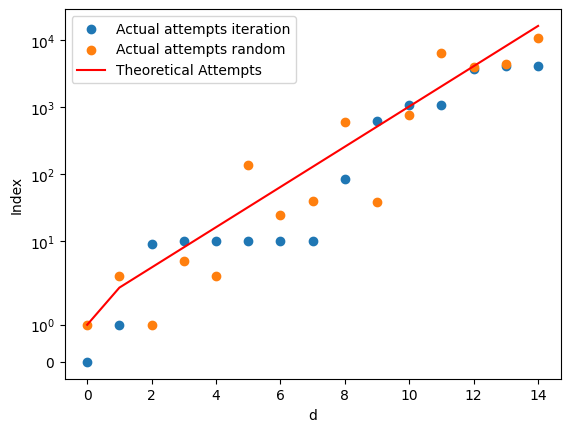

In [26]:
diffs = []
indexes = []
theoretical_attempts = []

for d in range(15):
    index = mine(d)
    diffs.append(d)
    indexes.append(index)
    theoretical_attempts.append(2**d)
    
plt.scatter(diffs, indexes, label='Actual attempts iteration')

diffs = []
indexes = []

for d in range(15):
    index = mine_random(d)
    diffs.append(d)  
    indexes.append(index)

plt.scatter(diffs, indexes, label='Actual attempts random')
plt.plot(diffs, theoretical_attempts, label='Theoretical Attempts', c='r')
plt.xlabel("d")
plt.yscale('symlog')
plt.ylabel("Index")
plt.legend()
plt.show()